# Build and Evaluate a Classification model

In [1]:
# Import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the python machine learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from function import *

## Define the task

"Make predictions about a country's life expectancy (L/M/H bands) from a set of metrics for the country."

## Acquire clean data

### Load the data

In [2]:
df = pd.read_csv('C:/Users/MyPC/MyPython/Project/Files/Supervised-Learning-master/world_data.csv')

### Inspect the data

In [3]:
df.shape

(194, 17)

In [4]:
df.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [5]:
df.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

In [6]:
df.isnull().mean().sort_values()

country            0.000000
water              0.000000
sanitation         0.000000
population         0.000000
income             0.005155
childmortality     0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

### Clean data

In [7]:
df = df.drop(['murder', 'urbanpopulation', 'unemployment'], axis=1)

In [8]:
means = df.mean().to_dict()

for m in means:
    df[m] = df[m].fillna(value=means[m])

In [9]:
df.isnull().mean()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

## Understand the data

### Compute descriptive stats

In [10]:
df.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,7.466359,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


### Visualize

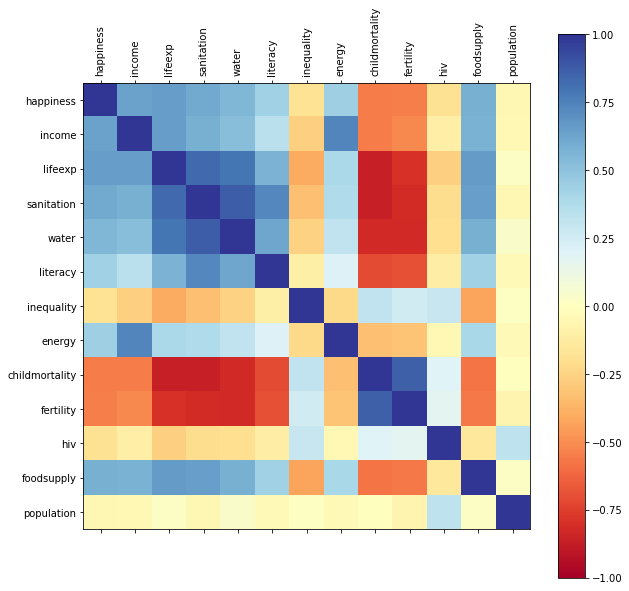

In [11]:
correlationMatrix(df)

## Prepare data

### Feature Engineering

In [12]:
df = appendEqualCountsClass(df, 'lifeexp_band', 'lifeexp', 3, ['L','M','H'])

In [13]:
df.lifeexp_band.value_counts()

H    65
L    65
M    64
Name: lifeexp_band, dtype: int64

**There're balanced classes**

In [14]:
df[['lifeexp','lifeexp_band']].head()

,lifeexp,lifeexp_band
0,57.9,L
1,77.6,H
2,76.5,H
3,75.4,M
4,82.6,H


### Select features and split into input and target features

In [15]:
df.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population', 'lifeexp_band'],
      dtype='object')

In [16]:
y = df['lifeexp_band']
X = df[['happiness', 'income', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population']]

In [17]:
X.head()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,3.982855,1750.0,39.2,63.0,39.000000,38.579375,2183.725325,73.2,4.80,5800.000000,2090.0,33700000
1,4.606651,11000.0,97.7,91.4,96.800000,29.000000,808.000000,14.0,1.71,217991.677852,3190.0,2920000
2,6.697131,19100.0,94.8,99.6,97.900000,41.400000,2020.000000,11.6,2.31,95000.000000,3230.0,43400000
3,4.348320,8180.0,91.6,98.9,99.600000,32.400000,1020.000000,14.0,1.66,3600.000000,2930.0,2920000
4,7.309061,43800.0,100.0,100.0,81.573826,34.700000,5480.000000,3.8,1.86,22000.000000,3280.0,23800000


In [18]:
y.head()

0    L
1    H
2    H
3    M
4    H
Name: lifeexp_band, dtype: category
Categories (3, object): ['L' < 'M' < 'H']

### Scale features

In [19]:
X.describe()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

X = pd.DataFrame(rescaledX, columns=X.columns)

In [21]:
X.describe()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.718449,0.830600,0.753331,0.473693,0.116950,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.314995,0.217698,0.228323,0.156411,0.140854,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.453562,0.726146,0.673025,0.375000,0.032539,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.869780,0.937423,0.753331,0.473693,0.083668,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.975248,0.991326,0.938086,0.551185,0.129928,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build Models

### Split into test and training sets

In [22]:
test_size = 0.33
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Create multiple models and fit them

In [23]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### Check models

In [25]:
predictions_dt = model_dt.predict(X_train)
print("DecisionTreeClassifier", accuracy_score(y_train,predictions_dt))

DecisionTreeClassifier 1.0


In [26]:
predictions_lr = model_lr.predict(X_train)
print("LogisticRegression", accuracy_score(y_train,predictions_lr))

LogisticRegression 0.8217054263565892


## Evaluate the models

In [27]:
predictions_dt = model_dt.predict(X_test)
print("DecisionTreeClassifier", accuracy_score(y_test,predictions_dt))

DecisionTreeClassifier 0.6307692307692307


In [28]:
predictions_lr = model_lr.predict(X_test)
print("LogisticRegression", accuracy_score(y_test,predictions_lr))

LogisticRegression 0.7230769230769231


## Inspect the models

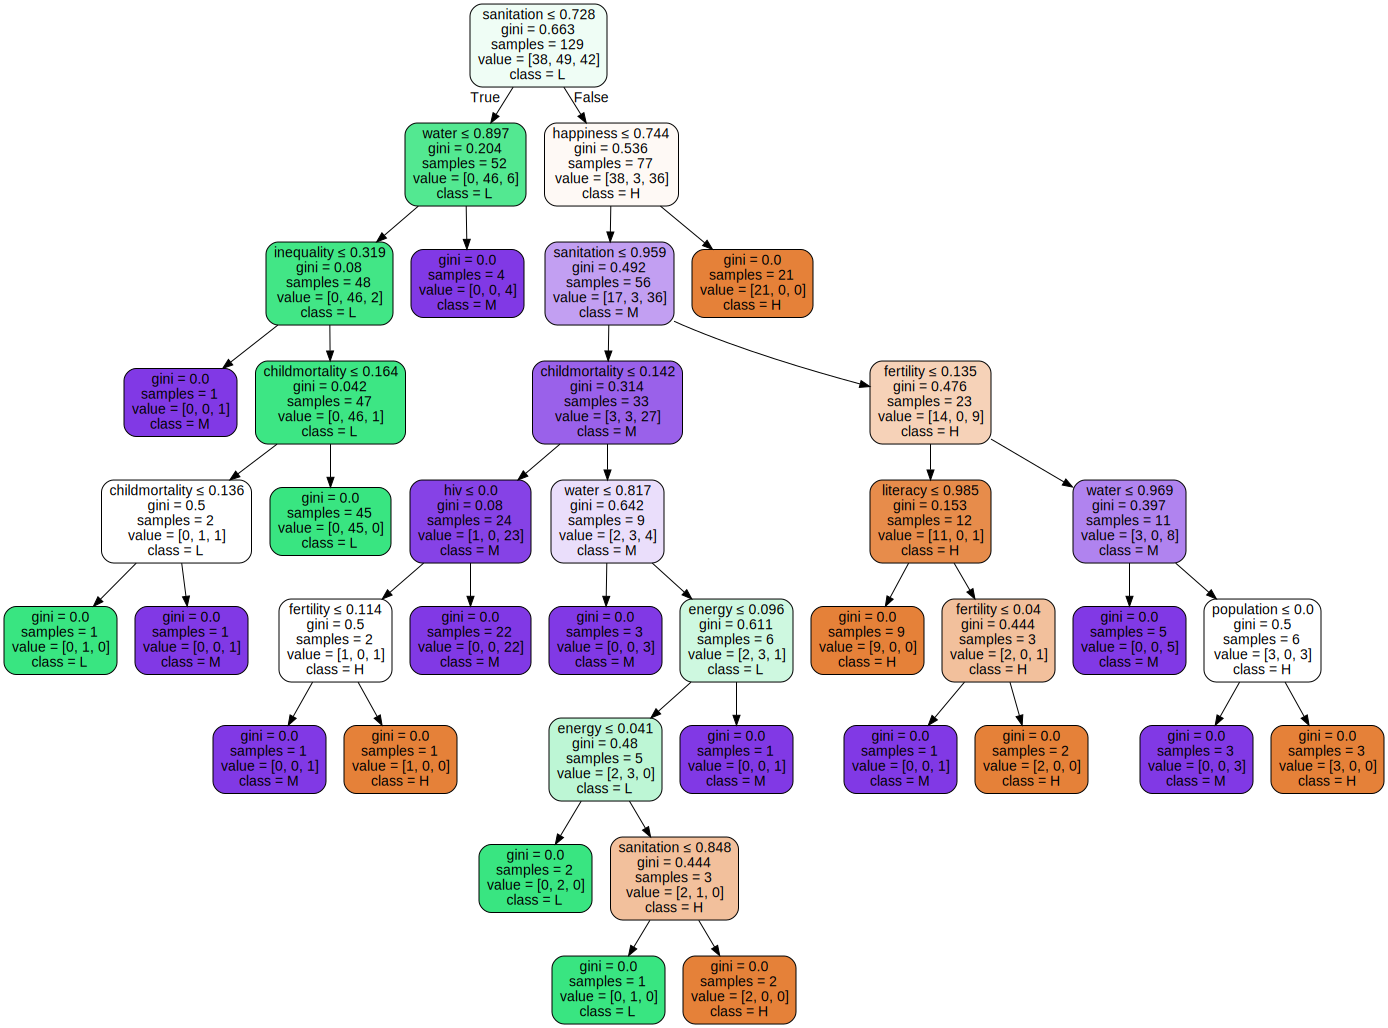

In [29]:
viewDecisionTree(model_dt,X.columns)

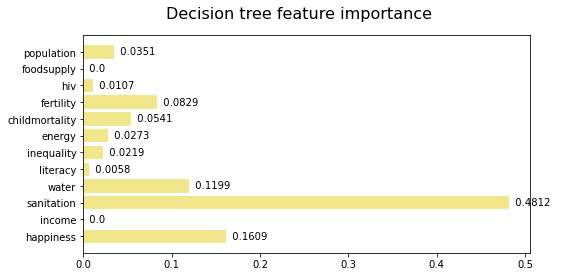

In [30]:
decisionTreeSummary(model_dt,X.columns)

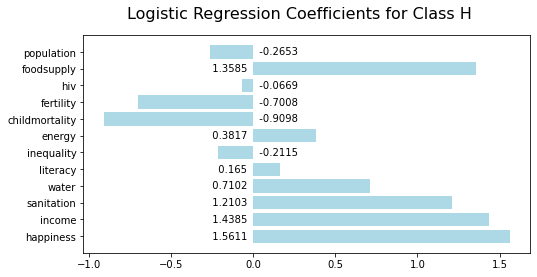

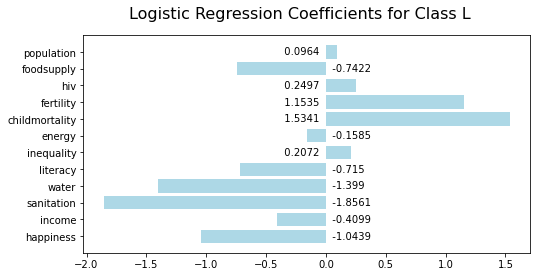

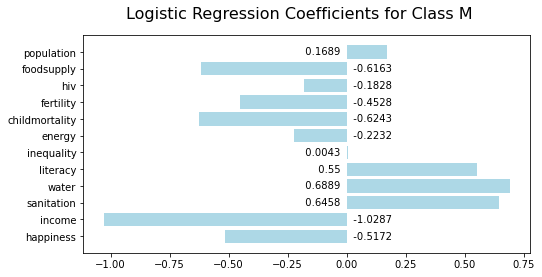

In [31]:
logisticRegressionSummary(model_lr,X.columns)